In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [56]:
df = pd.read_csv('laptop_prices.csv')
df.rename(columns={'Processor Score (cpubenchmark.net)':'Score'}, inplace = True)
df.rename(columns={'RAM Capacity (in GB)':'RAM'}, inplace = True)
df.rename(columns={'SSD (in GB)':'SSD', 'HDD (in GB)':'HDD'}, inplace = True)
df.rename(columns={'Display (in cm)':'Display'}, inplace = True)
df

,Laptop_Name,Popularity_Rank,ASUS,DELL,HP,Lenovo,Other brand,Processor,Score,RAM,Other OS,Windows 10,Windows 11,SSD,HDD,Display,Touchscreen,Price
0,Lenovo IdeaPad 3 Core i3 10th Gen,1,0,0,0,1,0,Intel Core i3 Processor (10th Gen),0.145791,8,0,0,1,256,0,39.62,0,34990
1,Lenovo IdeaPad 3 Core i3 11th Gen,2,0,0,0,1,0,Intel Core i3 Processor (11th Gen),0.228445,8,0,0,1,512,0,39.62,0,41990
2,ASUS TUF Gaming F15 Core i5 10th Gen,3,1,0,0,0,0,Intel Core i5 Processor (10th Gen),0.232960,8,0,0,1,512,0,39.62,0,57990
3,HP Core i3 11th Gen,4,0,0,1,0,0,Intel Core i3 Processor (11th Gen),0.228445,8,0,0,1,256,0,35.56,0,36990
4,ASUS Core i3 11th Gen,5,1,0,0,0,0,Intel Core i3 Processor (11th Gen),0.228445,8,0,0,1,256,0,39.62,0,34990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,DELL Inspiron Ryzen 3 Dual Core 3250U,565,0,1,0,0,0,AMD Ryzen 3 Dual Core Processor,0.145135,8,0,0,1,0,1024,38.00,0,39490
565,Lenovo Core i3 10th Gen,566,0,0,0,1,0,Intel Core i3 Processor (10th Gen),0.145791,4,0,1,0,0,1024,35.56,0,44590
566,Avita Pura Ryzen 5 Quad Core 3500U,567,0,0,0,0,1,AMD Ryzen 5 Quad Core Processor,0.283863,8,0,1,0,512,0,35.56,0,51490
567,Lenovo Ideapad S340 Core i3 10th Gen,568,0,0,0,1,0,Intel Core i3 Processor (10th Gen),0.145791,8,0,1,0,256,0,35.56,0,42990


In [55]:
df.Price.max()

75000

In [22]:
df.Price.min()

21490

In [23]:
df.Price.mean()

51014.24956063269

In [24]:
df.Price.median()

49990.0

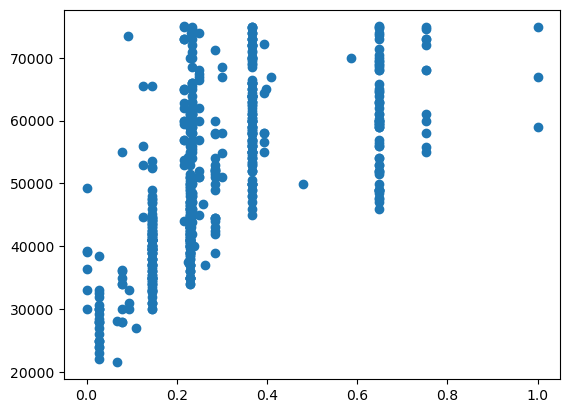

In [113]:
plt.scatter(df['Score'], df['Price'])

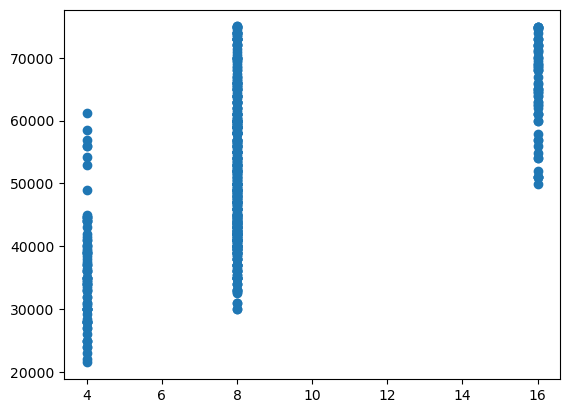

In [114]:
plt.scatter(df['RAM'], df['Price'])

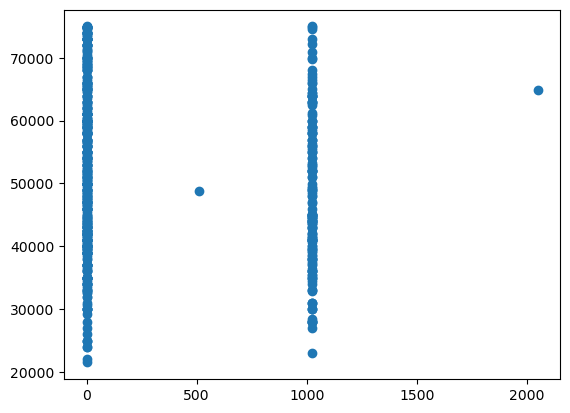

In [115]:
plt.scatter(df['HDD'], df['Price'])

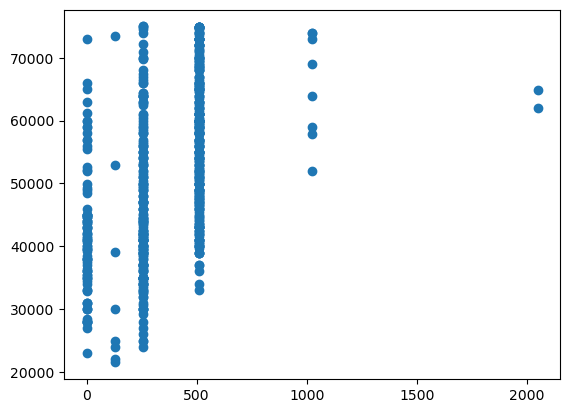

In [116]:
plt.scatter(df['SSD'], df['Price'])

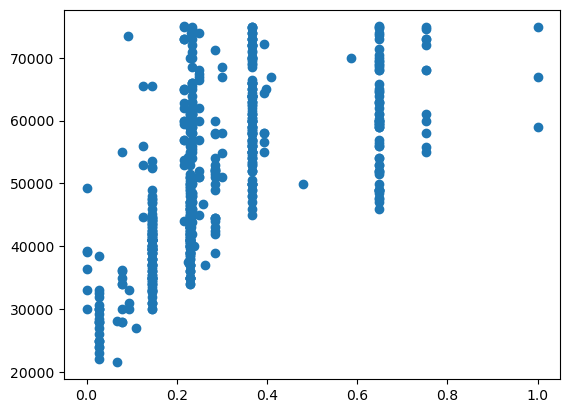

In [95]:
plt.scatter(df['Display'], df['Price'])

In [105]:
X =df[['ASUS', 'DELL', 'HP', 'Lenovo',  'Other brand', 'Score', 'RAM','SSD', 'HDD', 'Display']]
y = df['Price']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8)

In [107]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [108]:
reg.coef_

array([-1.18577215e+03,  2.51458475e+03,  1.59346276e+03, -2.15552102e+03,
       -7.66754335e+02,  2.81381600e+04,  9.14189353e+02,  2.62571969e+01,
        5.62520116e+00,  7.96135317e+01])

In [109]:
reg.intercept_

20267.32291279835

In [110]:
reg.predict(X_test)

array([47958.92176213, 52053.02266132, 36698.28321569, 38719.21590987,
       39411.84605092, 34462.10882356, 99957.49176794, 59319.08154768,
       59358.42502133, 40894.86282169, 57038.24690484, 73910.43343095,
       68563.98166035, 31427.89912389, 59156.20665083, 56715.01596618,
       45646.29873903, 63706.47080451, 50795.68175201, 56117.12491914,
       42627.17894436, 46177.28792804, 43112.20294416, 38442.09717459,
       41729.45538457, 56117.12491914, 41729.45538457, 30134.54440949,
       32410.02647522, 48128.06684214, 50316.40450861, 52159.76713876,
       39461.46466033, 53248.44739912, 38515.88171161, 56346.22293531,
       42699.2042609 , 42770.53017101, 42375.97332223, 47616.70521793,
       42699.2042609 , 56117.12491914, 61250.46683563, 51814.49477923,
       48451.2977808 , 60280.7179593 , 57391.8001482 , 48555.19711865,
       60328.17389766, 37059.64130508, 64627.59279021, 64627.59279021,
       42172.63912397, 56715.01596618, 41348.30986683, 39461.46466033,
      

In [111]:
y_test

217    42490
30     47990
39     31990
461    41990
226    37990
       ...  
486    58990
417    52380
229    57990
159    69990
323    64450
Name: Price, Length: 456, dtype: int64

In [112]:
reg.score(X_test, y_test)

0.4495524259524005